In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import least_squares, curve_fit

4.429860642196637e-08 [ 0.98362968 10.13564866  0.50012053]
 active_mask: array([0., 0., 0.])
        cost: 0.0068293516030714894
         fun: array([-0.00314312, -0.03732148,  0.01972365,  0.00147108, -0.04924982,
       -0.01017209,  0.00618423,  0.04158977, -0.00770687,  0.02021831,
       -0.04641298,  0.00951415, -0.00640073,  0.02927495, -0.00945123,
        0.02476681, -0.04449791, -0.00998919,  0.03331985, -0.00800885])
        grad: array([-1.94456277e-10, -1.28593900e-08, -4.42986064e-08])
         jac: array([[ 0.00624912, -0.00305494, -0.06191267],
       [ 0.01060686, -0.00461923, -0.10462582],
       [ 0.01794853, -0.00684597, -0.17573014],
       [ 0.03021663, -0.00986427, -0.29214863],
       [ 0.05043947, -0.01364315, -0.47750326],
       [ 0.08303782, -0.01774757, -0.75912017],
       [ 0.13373683, -0.0210054 , -1.15500545],
       [ 0.20835667, -0.02136745, -1.64444787],
       [ 0.30972518, -0.01662763, -2.13148218],
       [ 0.43341062, -0.00638558, -2.448224  ],


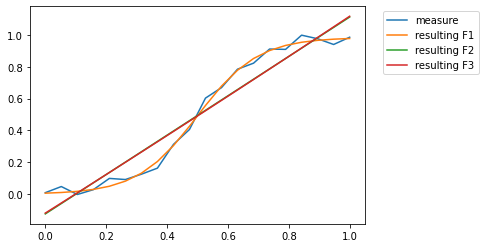

In [2]:
def func(theta, t):
    return theta[0] / (1 + np.exp(- theta[1] * (t - theta[2])))

def lin(theta, t):
    return theta[0] + theta[1] * t

def qua(theta, t):
    return theta[0] + theta[1] * t + theta[2] * t ** 2


u = np.linspace(0, 1, num=20)

K = 1; r = 10; t0 = 0.5; 
# v = func((K, r, t0), u)
# plt.plot(u, v, label="func(1, 10, 0.5)")
m = func((K, r, t0), u) + 0.1 * (np.random.rand(u.shape[0]) - 0.5)

plt.plot(u, m, label="measure")

def f(theta):
    return func(theta, u) - m

def f2(theta):
    return lin(theta, u) - m

def f3(theta):
    return qua(theta, u) - m


theta0 = [1,2,3]
res = least_squares(f, theta0)

if res.success:
    print(res.optimality, res.x)
    print(res)
    r = func(res.x, u)
    plt.plot(u, r, label="resulting F1")
else:
    print("Failed")

theta0 = [0, 1]
res = least_squares(f2, theta0)

if res.success:
    print(res.optimality, res.x)
    r = lin(res.x, u)
    plt.plot(u, r, label="resulting F2")
else:
    print("Failed")


theta0 = [0, 0.5, 0.5]
res = least_squares(f3, theta0)

if res.success:
    print(res.optimality, res.x)
    r = qua(res.x, u)
    plt.plot(u, r, label="resulting F3")
else:
    print("Failed")
    
    
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()
    

FUNCTION: 184.536 + -0.000 * x


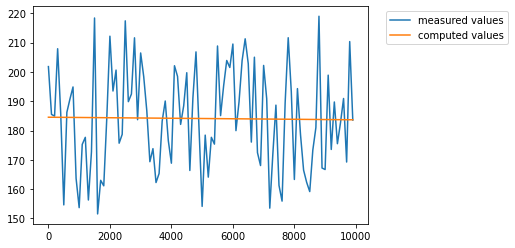

In [3]:
data_path = './AlgorithmComplexity'
sample = 'data01.txt'

with open(os.path.join(data_path, sample), 'r') as f:
    complexity = f.readline()
    values_x, values_y = [], []
    for l in f:
        x, y = l.split()
        values_x.append(float(x))
        values_y.append(float(y) / 1000)
        
# print(values_x)
# print(values_y)

x = np.array(values_x, dtype=float)
y = np.array(values_y, dtype=float)
max_y = np.max(y)
y += 0.3 * max_y * (np.random.rand(y.shape[0]) - 0.5)

def lin(theta, t):
    return theta[0] + theta[1] * t

def f(theta):
    return lin(theta, x) - y

theta0 = [0, 1]
res = least_squares(f, theta0)

if res.success:
    plt.plot(x, y, label="measured values")

    print(f"FUNCTION: {res.x[0]:6.3f} + {res.x[1]:6.3f} * x")
    r = lin(res.x, x)
    plt.plot(x, r, label="computed values")
else:
    print("Failed")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()


FUNCTION:  2.837 +  0.025 * x


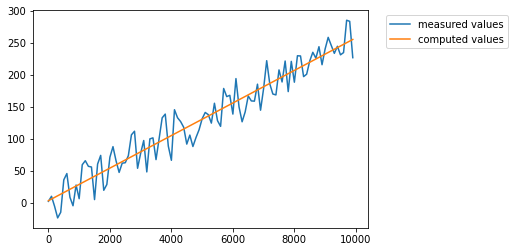

In [4]:
data_path = './AlgorithmComplexity'
sample = 'data02.txt'

with open(os.path.join(data_path, sample), 'r') as f:
    complexity = f.readline()
    values_x, values_y = [], []
    for l in f:
        x, y = l.split()
        values_x.append(float(x))
        values_y.append(float(y) / 1000)
        
x = np.array(values_x, dtype=float)
y = np.array(values_y, dtype=float)
max_y = np.max(y)
y += 0.3 * max_y * (np.random.rand(y.shape[0]) - 0.5)

def lin(theta, t):
    return theta[0] + theta[1] * t

def f(theta):
    return lin(theta, x) - y

theta0 = [0, 1]
res = least_squares(f, theta0)

if res.success:
    plt.plot(x, y, label="measured values")

    print(f"FUNCTION: {res.x[0]:6.3f} + {res.x[1]:6.3f} * x")
    r = lin(res.x, x)
    plt.plot(x, r, label="computed values")
else:
    print("Failed")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()


COMPLEXITY: O(2^n)

FUNCTION: -1742.901 + 741.420x + -80.676x^2 + 2.480x^3


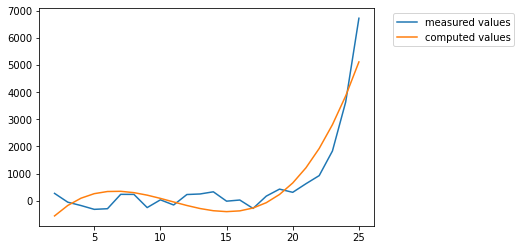

In [5]:
data_path = './AlgorithmComplexity'
sample = 'data07.txt'

with open(os.path.join(data_path, sample), 'r') as f:
    complexity = f.readline()
    print(f"COMPLEXITY: {complexity}")
    values_x, values_y = [], []
    for l in f:
        x, y = l.split()
        values_x.append(float(x))
        values_y.append(float(y) / 1000)
        
x = np.array(values_x, dtype=float)
y = np.array(values_y, dtype=float)
max_y = np.max(y)
y += 0.1 * max_y * (np.random.rand(y.shape[0]) - 0.5)

def lin(theta, t):
    return theta[0] + theta[1]*t + theta[2]*t**2 + theta[3]*t**3

def f(theta):
    return lin(theta, x) - y

theta0 = (0, 1, 1, 1)
res = least_squares(f, theta0)

if res.success:
    plt.plot(x, y, label="measured values")

    print(f"FUNCTION: {res.x[0]:5.3f} + {res.x[1]:5.3f}x + {res.x[2]:5.3f}x^2 + {res.x[3]:5.3f}x^3")
    r = lin(res.x, x)
    plt.plot(x, r, label="computed values")
else:
    print("Failed")

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()


In [6]:
data_path = './AlgorithmComplexity'
sample = 'data05.txt'

with open(os.path.join(data_path, sample), 'r') as f:
    complexity = f.readline()
    print(f"COMPLEXITY: {complexity}")
    values_x, values_y = [], []
    for l in f:
        x, y = l.split()
        values_x.append(float(x))
        values_y.append(float(y) / 1000)
        
x = np.array(values_x, dtype=float)
y = np.array(values_y, dtype=float)
max_y = np.max(y)
y += 0.1 * max_y * (np.random.rand(y.shape[0]) - 0.5)

def quadratic(x, a, b, c):
    return a + b*x + c*x**2

# params0 = (0, 1, 1)
popt, pcov = curve_fit(quadratic, x, y)

print(popt)
print(pcov)
print(np.diag(pcov))
perr = np.sqrt(np.diag(pcov))
print(perr)

COMPLEXITY: O(n^2 log n)

[-30.98044507  -1.81750838   0.05280962]
[[ 5.73992976e+03 -7.27324991e+01  1.96401357e-01]
 [-7.27324991e+01  1.05000695e+00 -3.02095447e-03]
 [ 1.96401357e-01 -3.02095447e-03  9.07193537e-06]]
[5.73992976e+03 1.05000695e+00 9.07193537e-06]
[7.57623241e+01 1.02469847e+00 3.01196537e-03]


In [8]:
data_path = './AlgorithmComplexity'
data_sets = [
    'data01.txt',
    'data02.txt',
    'data03.txt',
    'data04.txt',
    'data05.txt',
    'data06.txt',
    'data07.txt',
]

np.set_printoptions(precision=3)

for sample in data_sets:
    with open(os.path.join(data_path, sample), 'r') as f:
        complexity = f.readline()
        print(f"DATASET: {sample}")
        print(f"COMPLEXITY: {complexity}")
        values_x, values_y = [], []
        for l in f:
            x, y = l.split()
            values_x.append(float(x))
            values_y.append(float(y) / 1000)
        
    x = np.array(values_x, dtype=float)
    y = np.array(values_y, dtype=float)
    max_y = np.max(y)
    y += 0.1 * max_y * (np.random.rand(y.shape[0]) - 0.5)

    def quadratic(x, a, b):
        return a + b*x

    # params0 = (0, 1, 1)
    popt, pcov = curve_fit(quadratic, x, y)

#     print(popt)
#     print(pcov)
    perr = np.sqrt(np.diag(pcov))
    print(perr)

    print('-'*40)

DATASET: data01.txt
COMPLEXITY: O(1)

[1.679e+00 2.926e-04]
----------------------------------------
DATASET: data02.txt
COMPLEXITY: O(n)

[1.532e+00 2.672e-04]
----------------------------------------
DATASET: data03.txt
COMPLEXITY: O(n log n)

[5.216e+00 9.056e-04]
----------------------------------------
DATASET: data04.txt
COMPLEXITY: O(n^2)

[3.494e+01 6.742e-03]
----------------------------------------
DATASET: data05.txt
COMPLEXITY: O(n^2 log n)

[108.691   0.591]
----------------------------------------
DATASET: data06.txt
COMPLEXITY: O(n^3)

[105.127   0.365]
----------------------------------------
DATASET: data07.txt
COMPLEXITY: O(2^n)

[550.047  36.256]
----------------------------------------


In [33]:
x = np.concatenate((np.arange(10, 100, 20), np.arange(100, 1001, 200)))

y = 1.15 + 0.23 * np.power(x, 2)

# v = func((K, r, t0), u)
# plt.plot(u, v, label="func(1, 10, 0.5)")
# m = func((K, r, t0), u) + 0.1 * (np.random.rand(u.shape[0]) - 0.5)

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

z = y + y * (np.random.rand(y.shape[0]) - 0.5) * 0.1

print(x)
print(y)
print(z)

# print(np.hstack([x, y]))


[ 10  30  50  70  90 100 300 500 700 900]
[    24.15    208.15    576.15   1128.15   1864.15   2301.15  20701.15
  57501.15 112701.15 186301.15]
[    24.818    206.467    576.694   1142.221   1861.093   2239.507
  21175.354  58231.456 115257.191 191215.308]
